In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

#size should be 6by9

In [5]:
# Import drug death csv into a dataframe
drug_data = pd.read_csv("Resources/drug_death_data_clean.csv")
#drug_data.columns
#drug_data

FileNotFoundError: File b'Resources/drug_death_data_clean.csv' does not exist

In [ ]:

dates = [ i[0:10] for i in drug_data["Date"]]

#print(dates)

In [ ]:
import datetime

dates = [i.split('/')for i in dates]

week_days= ['Monday', 'Tuesday', 'Wed', 'Thurs', 'Friday', 'Saturday','Sunday']

#month/day/year
dateList=list((list(map(int, x)) for x in dates))

#day/month/year format
numDayList = [datetime.date(l[2],l[0],l[1]).weekday() for l in dateList]
alpaDayList = [week_days[int(d)] for d in numDayList]


daysDataFrame = pd.DataFrame(alpaDayList)
daysDataFrame = daysDataFrame.rename(columns = {0:"Count"})
daysSum= pd.DataFrame(daysDataFrame["Count"].value_counts())



#daysSum

In [ ]:
#used by gmap on other notebook
daysDataFrametoExport = daysDataFrame.rename(columns={"Count":"dayOfWeek"})

daysDataFrametoExport.to_csv("Resources/dayOfWeekDeaths.csv")
#daysDataFrametoExport

In [3]:
#Scatter Plot Daily deaths 

fig = plt.figure()
plt.figure(figsize=(9,6))
plt.plot(week_days,daysSum["Count"],"x--",color='black')
plt.grid(axis='y')

plt.xlabel("Day of Week")
plt.ylabel("Deaths")
plt.title("Daily Deaths [2012-2018]")

plt.savefig("Charts/dailyDeaths.png")


NameError: name 'week_days' is not defined

<Figure size 432x288 with 0 Axes>

<Figure size 648x432 with 0 Axes>

In [56]:
dayOfMonth = []
dayOfMonth = [i[1] for i in dateList]
dayOfMonth = pd.DataFrame(dayOfMonth)

dayOfMonth = pd.DataFrame(dayOfMonth[0].value_counts())
#dayOfMonth


<Figure size 432x288 with 0 Axes>

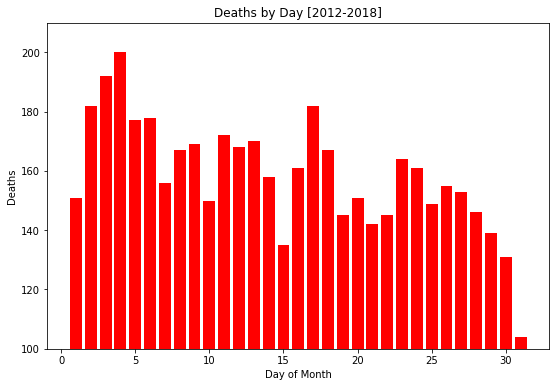

In [57]:
#bar plot Deaths by day of month
fig = plt.figure()
plt.figure(figsize=(9,6))

plt.bar(dayOfMonth.index,dayOfMonth[0],color='r')
plt.xlabel("Day of Month")
plt.ylim(100,210)
plt.title("Deaths by Day [2012-2018]")
plt.ylabel("Deaths")

plt.savefig("Charts/deathsByDayofMonth.png")


The r-squared is: -0.6949229948346797


<Figure size 432x288 with 0 Axes>

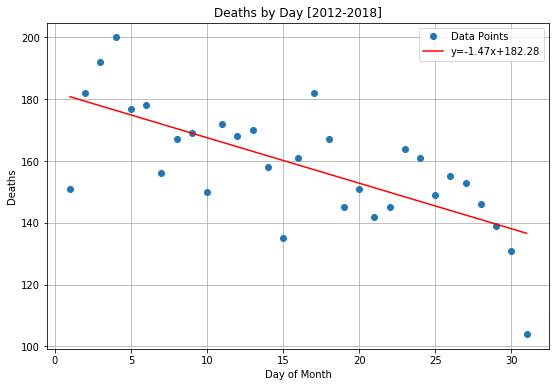

In [58]:
#scatter plot deaths by day of month
list1=list(range(1,32))

slope, intercept,rValue,p_value, std_err = linregress(list1,dayOfMonth[0].sort_index())
reg= intercept + [slope*i for i in list1]

print(f"The r-squared is: {rValue}")

fig = plt.figure()
plt.figure(figsize=(9,6))

plt.plot(dayOfMonth,"o",label = "Data Points")
plt.plot(list1,reg,'r',label=(f"y={round(slope,2)}x+{round(intercept,2)}"))
plt.grid()
plt.legend()
plt.title("Deaths by Day [2012-2018]")
plt.xlabel("Day of Month")
plt.ylabel("Deaths")

plt.savefig("charts/deathsbyDayofMonthScatter.png")
#dayOfMonth

In [59]:
#possibly used by other notebook
monthDataFrametoExport = month.rename(columns={0:"month"})

monthDataFrametoExport.to_csv("Resources/monthDeaths.csv")
#monthDataFrametoExport

The r-squared is: -0.6949229948346797


<Figure size 432x288 with 0 Axes>

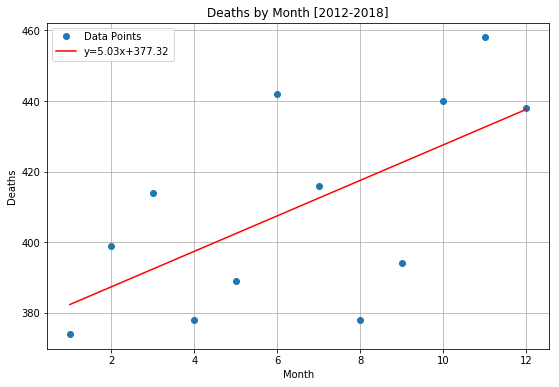

In [60]:
#Deaths by Month scatter
list1=list(range(1,13))

month = [i[0] for i in dateList]
month = pd.DataFrame(month)
monthValues = (month[0]).value_counts()
monthValues = pd.DataFrame(monthValues)

print(f"The r-squared is: {rValue}")

fig = plt.figure()
plt.figure(figsize=(9,6))

plt.plot(monthValues,'o',label = "Data Points")
plt.grid()
slope, intercept,rValue,p_value, std_err = linregress(list1,monthValues[0].sort_index())
reg= intercept + [slope*i for i in list1]

plt.plot(list1,reg,'r',label=(f"y={round(slope,2)}x+{round(intercept,2)}"))

plt.legend()
plt.title("Deaths by Month [2012-2018]")
plt.xlabel("Month")
plt.ylabel("Deaths")

plt.savefig("Charts/deathsbyMonthScatter.png")
